In [1]:
import geopandas as gpd
import pandas as pd

In [5]:
shrug_secc = pd.read_csv("../data/shrug-v1.5.samosa-secc-csv/shrug-v1.5.samosa-secc-csv/shrug_secc.csv")
shrug_secc.head()

,shrid,secc_inc_cultiv_share,nco2d_cultiv_share,secc_cons_pc_rural,secc_cons_pc_urban,secc_pov_rate_rural,secc_pov_rate_urban,secc_pov_rate_tend_rural,secc_pov_rate_tend_urban,num_members_mean_rural,num_members_mean_urban
0,11-01-000002,0.013158,0.248276,13509.520,NaN,0.477891,NaN,0.391156,NaN,6.241497,NaN
1,11-01-000005,0.023762,0.518018,8611.758,NaN,0.776421,NaN,0.679805,NaN,7.101151,NaN
2,11-01-000006,0.149701,0.400000,9498.939,NaN,0.730325,NaN,0.624344,NaN,6.672613,NaN
3,11-01-000007,0.005882,0.803150,11964.710,NaN,0.530650,NaN,0.386093,NaN,6.968893,NaN
4,11-01-000009,0.079812,0.291469,10137.010,NaN,0.681202,NaN,0.661167,NaN,5.824985,NaN


In [ ]:
/Users/amiremami/IDinsight Repos/ds_nudge_up/data/shrug-v1.5.samosa-secc-csv/shrug-v1.5.samosa-keys-csv/shrug_pc01r_key.csv

### There are no shapefiles for SHRUG...

>"The SHRUG does not include geographic data in the form of polygons or shapefiles because
we have not yet found a sufficiently accurate data source with open sharing privileges. We are
continuing to investigate sources of geographic data and may include shapefiles in a future version
of the SHRUG. Users interested in obtaining geocodes or polygons for SHRUG units are advised
to examine the open village maps offered by NASA-SEDAC at Columbia University. These can
be directly merged to the 2001 Population Census SHRUG keys in shrug pc01r key.dta and
shrug pc01u key.dta. Our own aggregate data was based on 2011 village polygons which we
believe are slightly more accurate but are not made available with an open data license."

Get NASA-SEDAC data:

<AxesSubplot: >

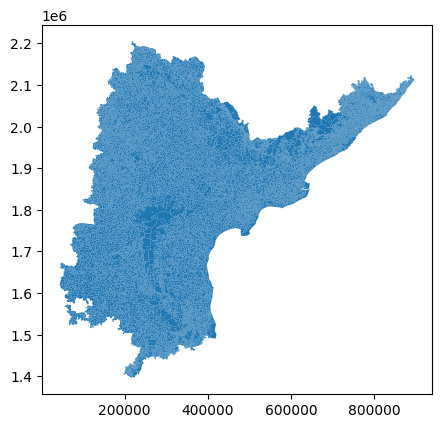

In [10]:
ap_dbf = gpd.read_file(f"../data/NASA/india-india-village-level-geospatial-socio-econ-1991-2001-ap-2001-shp/india-village-census-2001-AP.dbf")
ap_dbf.plot()

In [12]:
ap_df = pd.DataFrame(ap_dbf)
ap_df.head()

,SID,DID,TID,VILL_CODE,C_CODE01,NAME,UID,CENSUS_COD,STATE,DISTRICT,...,TANK_IRR,RIVER_IRR,LAKE_IRR,W_FALL,OTH_IRR,TOT_IRR,UN_IRR,CULT_WASTE,AREA_NA_CU,geometry
0,28,01,0001,00000200,2801000100000200,Guledi,550792,2.800000e+15,28,1,...,0.0,0.0,0,0,0,1.61,273.97,30.75,160.0,"POLYGON ((217363.705 2201317.999, 217341.758 2..."
1,28,01,0001,00000300,2801000100000300,Gomutri,550793,2.800000e+15,28,1,...,0.0,0.0,0,0,0,4.04,577.48,70.00,100.0,"POLYGON ((217363.705 2201317.999, 217420.191 2..."
2,28,01,0001,00000100,2801000100000100,Karanji (T),550794,2.800000e+15,28,1,...,0.0,0.0,0,0,0,12.00,22.34,168.00,17.0,"POLYGON ((217400.462 2201192.226, 217950.957 2..."
3,28,01,0001,00000400,2801000100000400,Antargaon,550795,2.800000e+15,28,1,...,0.0,0.0,0,0,0,1.61,460.00,10.11,67.2,"POLYGON ((223087.684 2198792.248, 223023.184 2..."
4,28,01,0001,00000500,2801000100000500,Arli (T),550796,2.800000e+15,28,1,...,0.0,0.0,0,0,0,2.42,1300.25,200.00,253.0,"POLYGON ((223087.684 2198792.248, 223280.074 2..."


Get SHRUG keys:

In [21]:
shrug_pc01r_key = pd.read_csv("../data/shrug-v1.5.samosa-secc-csv/shrug-v1.5.samosa-keys-csv/shrug_pc01r_key.csv")
shrug_pc01r_key.head()

,pc01_state_id,pc01_district_id,pc01_subdistrict_id,pc01_village_id,shrid
0,1,1.0,1.0,100,11-01-000001
1,1,1.0,1.0,200,11-01-000002
2,1,1.0,1.0,300,11-01-000003
3,1,1.0,1.0,400,11-01-000004
4,1,1.0,1.0,500,11-01-000005


In [22]:
shrug_pc01u_key = pd.read_csv("../data/shrug-v1.5.samosa-secc-csv/shrug-v1.5.samosa-keys-csv/shrug_pc01u_key.csv")
shrug_pc01u_key.head()

,pc01_state_id,pc01_town_id,shrid
0,1,40101000,11-01-800001
1,1,40102000,11-01-800002
2,1,40201000,11-01-800010
3,1,40202000,11-01-800011
4,1,40203000,11-01-800012


Match SHRUG and NASA-SEDAC on keys: